In [ ]:
#!pip install imutils
#!pip install opencv-python

In [4]:
#load the modules
from imutils import paths
import random
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [5]:
#function for motion blur
#adapted from Joshi, P. (2015). OpenCV with Python by example. Packt Publishing Ltd.
def blurpic(img, size):
    kernel_motion_blur = np.zeros((size, size))
    kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
    kernel_motion_blur = kernel_motion_blur / size
    img = cv2.filter2D(img, -1, kernel_motion_blur)
    return img

In [6]:
#function to resize picture
def resizing(img, x, y, n,m):
    #x and y as the width and height of the image
    #n and m define the interval by which the image will be downsized
    t=round(random.uniform(n, m),2)
    img = cv2.resize(img, (int(x/t), int(y/t))) 
    return img

In [7]:
#function for gaussian noise transformation
def gnoise(img, mean, sd):
    img = img+ np.random.normal(mean,sd, img.shape)
    img = np.clip(img, 0, 255)
    return img

In [8]:
#function for gaussian blur transformation
def gblur(img, size):
    img=cv2.GaussianBlur(img,(size,size),0)
    return img

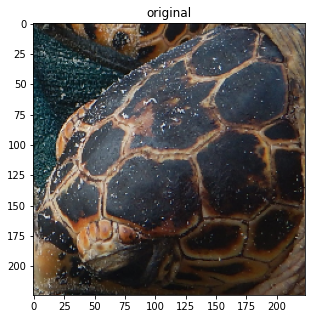

In [9]:
#load a test image to check the different transformations
#plot after resizing to 224x224 (the image size used for training the VGG19)
img =cv2.imread('../images/ID_009TNNQ8.JPG')
fig=plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(cv2.resize(img, (224,224)), cv2.COLOR_BGR2RGB))
plt.title("original")
plt.show()

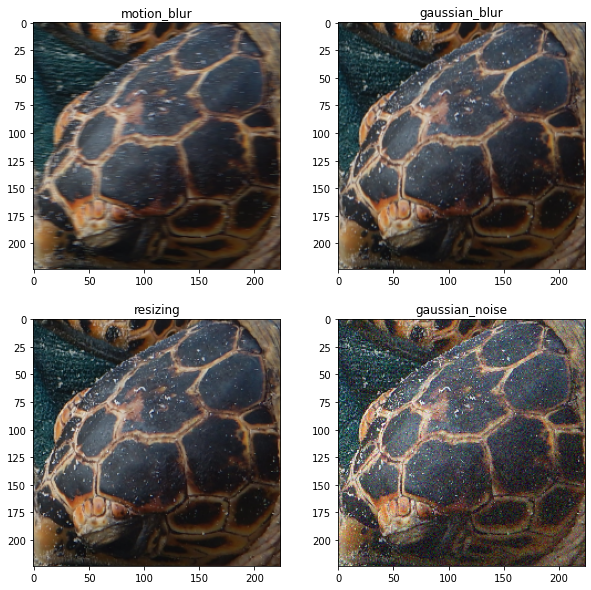

In [10]:
#plot the different transformations for comparison
fig=plt.figure(figsize=(10, 10))
columns = 2
rows = 2
x=img.shape[1]
y=img.shape[0]
images_list=[]
images_list.append(blurpic(img, 15))
images_list.append(gblur(img, 7))
images_list.append(resizing(img, x, y ,1.5,2.5))

transformations_titles=[ "motion_blur", "gaussian_blur", "resizing"]
p=0
for i in range(1, columns*rows):
    fig.add_subplot(rows, columns, i)
    plt.title(transformations_titles[p])
    plt.imshow(cv2.cvtColor(cv2.resize(images_list[p], (224,224)), cv2.COLOR_BGR2RGB))
    p=p+1

#extra step to plot the gnoise transformation
#which only properly plots after converting to .astype(np.uint8)
fig.add_subplot(rows, columns, 4)
imgnoise=gnoise(img,15,25).astype(np.uint8)
plt.title("gaussian_noise")
plt.imshow(cv2.cvtColor(cv2.resize(imgnoise, (224,224)), cv2.COLOR_BGR2RGB))

plt.show()

## Creating blur and noise on all train data

The following code will create for transformed images per image in the train folder. The images will be saved directly into the corresponding id_turtle sub-folder.

In [63]:
#directory containing the original dataset
dataset="../sorted_images/train"
#list all images in the original dataset
imagePaths = sorted(list(paths.list_images(dataset)))

#loop through all images to apply the transformations
for imagePath in imagePaths:
    #define the output folder and add the name of the image file - this saves the images directly into the subfolder in sorted_images/train
    directory_output="../sorted_images/train/"+ imagePath[23:-16] + "/" + imagePath.split(os.path.sep)[-1][:-4]
    #load the image
    img =cv2.imread(imagePath)
    #apply the motion blur transformation
    imgb=blurpic(img, 15)
    #save the image
    cv2.imwrite(str(directory_output+"b"+".jpg"), imgb)
    
    #apply the resizing  transformation
    x=img.shape[1]
    y=img.shape[0]
    imgr=resizing(img,x, y, 2,3.5)
    #save the image
    cv2.imwrite(str(directory_output+"r"+".jpg"), imgr)
    
    #apply the gaussian noise transformation
    imgg=gnoise(img,15,25)
    #save the image
    cv2.imwrite(str(directory_output+"g"+".jpg"), imgg)
    #apply the gaussian blur transformation
    imggb=gblur(img, 7)
    #save the image
    cv2.imwrite(str(directory_output+"gb"+".jpg"), imggb)
    
    #in order to apply a mixture of transformations to the same image
    #generate two random numbers that will define which transformation
    #will be applied
    transformations=random.sample(set([1,2,3,4]), 2)
    
    for t in range(0,1):
        if transformations[t]==1:
            img=blurpic(img, 15)
        if transformations[t]==2:
            img=gnoise(img,15,25)
        if transformations[t]==3:
            img=gblur(img, 7)
        if transformations[t]==4:
            img=resizing(img, x, y ,1.5,2.5)
    #save the image after applying to different transformations
    cv2.imwrite(str(directory_output+"m"+".jpg"), img)

/var/folders/jl/yr_857sx3mz_26fn6qdhy_w40000gn/T/ipykernel_4979/2517740551.py:36: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  transformations=random.sample(set([1,2,3,4]), 2)


### Now we are ready to train our model